In [94]:
print('jello')

jello


In [120]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

# Cascaded Integrator-Comb filter

class CICDecimator:

    def __init__(self, R, M, N):
        """Decimating low pass IIR filter.

           Keyword arguments:
           R -- decimation ratio
           M -- samples/stage
           N -- filter order
        """
        # self.R = R
        # self.M = M
        # self.N = N
        self.integrators = [Integrator() for i in range(N)]
        self.decimator = Decimator(R)
        self.combs = [Comb(M) for i in range(N)]

    def process(self, samples):
        global integrated, decimated, combed

        print(f'samples: {ss(samples)}')
        # integrate
        integrated = samples
        for i in self.integrators:
            integrated = i.process(integrated)
        print(f'interpo: {ss(integrated)}')

        # decimate
        decimated = self.decimator.process(integrated)
        print(f'decimat: {ss(decimated)}')

        # comb
        combed = decimated
        for c in self.combs:
            combed = c.process(combed)
        print(f'combed : {ss(combed)}')

        return combed

def ss(s):
    sss = ' '.join(str(round(x)) for x in s)
    if len(sss) > 60:
        sss = sss[:57] + '...'
    sss += f' max {round(max(s))}'
    sss += f' avg {sum(s) / len(s)}'
    return sss

class Integrator:

    def __init__(self):
        self.acc = 0
    
    def process(self, samples):
        acc = self.acc
        out = []
        for x in samples:
            acc += x
            # acc = int(decay * acc + x)
            out.append(acc)
        self.acc = acc
        return out


class Decimator:

    def __init__(self, R):
        self.R = R
        self.remainder = 0

    def process(self, samples):
        R = self.R
        rem = self.remainder
        self.remainder = (rem + len(samples)) % R
        return samples[rem::R]


class Comb:

    def __init__(self, M):
        self.M = M
        self.mem = [0] * M

    def process(self, samples):
        M = self.M
        n = len(samples)
        acc = sum(self.mem)
        ms = self.mem + list(samples)
        out = []
        for i in range(n):
            acc += samples[i] - ms[i]
            # out.append(acc)
            #print(f'{i}: samples[{i}] = {samples[i]}')
            print(f'{i}: {samples[i]} - {ms[i]} = {samples[i] - ms[i]}')
            out.append(samples[i] - ms[i])
        self.mem = ms[-M:]
        return out




samples: 0 16 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 16 0 0 0 0 0 0... max 16 avg 0.8
interpo: 0 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 1... max 160 avg 87.2
decimat: 0 16 32 48 64 80 96 96 112 128 144 160 max 160 avg 81.33333333333333
0: 0 - 0 = 0
1: 16 - 0 = 16
2: 32 - 16 = 16
3: 48 - 32 = 16
4: 64 - 48 = 16
5: 80 - 64 = 16
6: 96 - 80 = 16
7: 96 - 96 = 0
8: 112 - 96 = 16
9: 128 - 112 = 16
10: 144 - 128 = 16
11: 160 - 144 = 16
combed : 0 16 16 16 16 16 16 0 16 16 16 16 max 16 avg 13.333333333333334


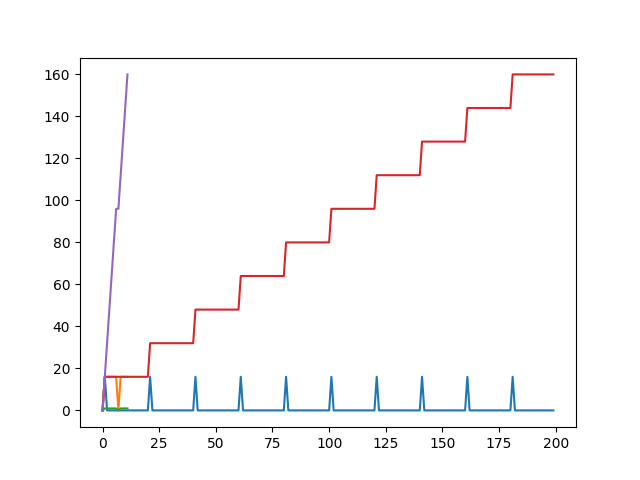

In [125]:
decay = 0.875
R, M, N = 17, 1, 1
cic = CICDecimator(R, M, N)
ns = 200
samples = [0] * ns
samples[1::20] = [+16] * (ns // 20)
# samples[11::20] = [+16] * (ns // 20)
out = cic.process(samples)

fig = plt.figure()
plt.plot(samples)
plt.plot(out)
plt.plot(np.array(out) / (R ))
plt.plot(integrated)
plt.plot(decimated)
# plt.plot((np.array(combed) - np.array(decimated)) - 50)
None